In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文标签
plt.rcParams['axes.unicode_minus']=False    #显示负号

In [51]:
####移动平均数预测餐饮业
df = pd.read_excel('餐饮业时间序列.xlsx')
df=df.dropna()
forecast=np.array(df['电量'])                          
for i in range(4):                                     #预测新的4期数据
    forecast=np.append(forecast,forecast[-5:].mean())
forecast[-4:]                                          #预测值
df['MA5电量']=df['电量'].rolling(window=5).mean()    #添加移动平均数电量列
for i in range(4):                              #将预测值插入电量列
    df.loc[i+36]=[i+202101,forecast[i-4],'Nan']
for i in range(3):
    df['MA5电量'][i+36]=forecast[i-3]          #填满移动平均数列
df.tail(8)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,月份,电量,MA5电量
32,202009,26891.0000,24228.2
33,202010,21024.0000,25772.8
34,202011,23765.0000,25968.8
35,202012,17240.0000,22606.6
36,202101,22606.6000,22305.3
37,202102,22305.3200,21388.2
38,202103,21388.1840,21461
39,202104,21461.0208,Nan


In [49]:
####移动平均数预测住宿
df = pd.read_excel('住宿时间序列.xlsx')
df=df.dropna()
forecast=np.array(df['电量'])
for i in range(4):
    forecast=np.append(forecast,forecast[-5:].mean())
df['MA5电量']=df['电量'].rolling(window=5).mean()    #添加移动平均数电量列
forecast[-4:]
for i in range(4):                                   #将预测值插入电量列
    df.loc[i+36]=[i+202101,forecast[i-4],'Nan']
for i in range(3):
    df['MA5电量'][i+36]=forecast[i-3]                #填满移动平均数列

E:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [52]:
####移动平均数预测交通
df = pd.read_excel('交通时间序列.xlsx')
df=df.dropna()
forecast=np.array(df['电量'])
for i in range(4):
    forecast=np.append(forecast,forecast[-5:].mean())
df['MA5电量']=df['电量'].rolling(window=5).mean()    #添加移动平均数电量列
forecast[-4:]
for i in range(4):                              #将预测值插入电量列
    df.loc[i+36]=[i+202101,forecast[i-4],'Nan']
for i in range(3):
    df['MA5电量'][i+36]=forecast[i-3]          #填满移动平均数列
df.tail(8)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,月份,电量,MA5电量
32,202009,3674.0000,3905.6
33,202010,3314.0000,3614.4
34,202011,5700.0000,3906.8
35,202012,3761.0000,4017.6
36,202101,4017.6000,4093.32
37,202102,4093.3200,4177.18
38,202103,4177.1840,4349.82
39,202104,4349.8208,Nan


In [53]:
####移动平均数预测娱乐及观光活动
df = pd.read_excel('娱乐及观光活动时间序列.xlsx')
df=df.dropna()
forecast=np.array(df['电量'])
for i in range(4):
    forecast=np.append(forecast,forecast[-5:].mean())
df['MA5电量']=df['电量'].rolling(window=5).mean()    #添加移动平均数电量列
forecast[-4:]
for i in range(4):                              #将预测值插入电量列
    df.loc[i+36]=[i+202101,forecast[i-4],'Nan']
for i in range(3):
    df['MA5电量'][i+36]=forecast[i-3]          #填满移动平均数列
df.tail(8)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,月份,电量,MA5电量
32,202009,1428.0000,1761.2
33,202010,1686.0000,1586.2
34,202011,2187.0000,1555.6
35,202012,1834.0000,1675.8
36,202101,1675.8000,1762.16
37,202102,1762.1600,1828.99
38,202103,1828.9920,1857.59
39,202104,1857.5904,Nan


E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


NameError: name 'pyplot' is not defined

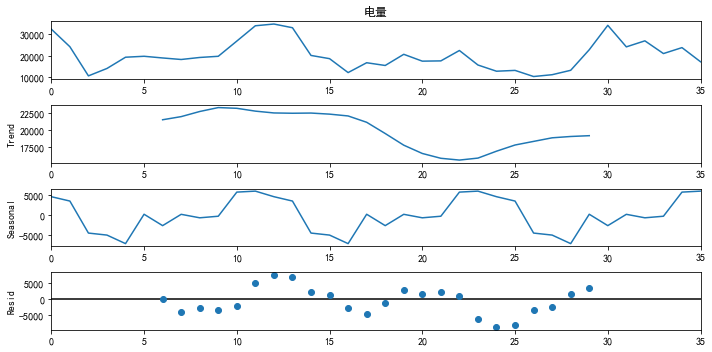

In [104]:
##指数平滑预测餐饮业
df = pd.read_excel('餐饮业时间序列.xlsx')
#分解
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
result = seasonal_decompose(df['电量'], model='additive', freq=12)
 
rcParams['figure.figsize'] = 10, 5
result.plot()
pyplot.figure(figsize=(40,10))
pyplot.show()

In [109]:
#指数平滑预测(无趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend=None, seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


659.7235226480755

In [115]:
#指数平滑预测(无趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend=None, seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


665.4744767694315

In [111]:
#指数平滑预测(加法趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

680.6473833053168

In [112]:
#指数平滑预测(加法趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='add', seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

681.0701202607994

In [113]:
#指数平滑预测(乘法趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='multiplicative', seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


679.1988655859986

In [114]:
#指数平滑预测(乘法趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='multiplicative', seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


678.3340889582884

In [116]:
#确定模型，预测4期数据 【无趋势，乘法模型】
fcast = EMA_fit.forecast(4)
fcast

36    19044.628763
37    19425.785508
38    12533.839492
39    12246.953719
dtype: float64

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


NameError: name 'pyplot' is not defined

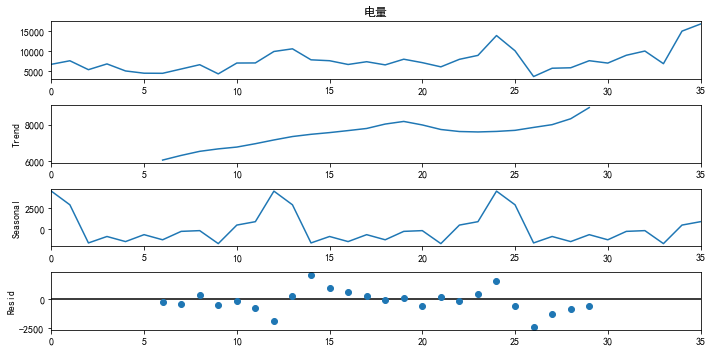

In [117]:
##指数平滑预测住宿
df = pd.read_excel('住宿时间序列.xlsx')
#分解
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
result = seasonal_decompose(df['电量'], model='additive', freq=12)
 
rcParams['figure.figsize'] = 10, 5
result.plot()
pyplot.figure(figsize=(40,10))
pyplot.show()

In [124]:
#指数平滑预测(无趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend=None, seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

579.3542809004198

In [123]:
#指数平滑预测(无趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend=None, seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

580.0770110315764

In [118]:
#指数平滑预测(加法趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


586.0891743840903

In [119]:
#指数平滑预测(加法趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='add', seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


586.8714794620339

In [120]:
#指数平滑预测(乘法趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='multiplicative', seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


591.1905413699571

In [121]:
#指数平滑预测(乘法趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='multiplicative', seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

590.1894445498182

In [125]:
#确定模型，预测4期数据 【无趋势，加法周期)】
fcast = EMA_fit.forecast(4)
fcast

36    22800.920220
37    17551.832400
38     7809.281800
39    13311.403801
dtype: float64

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


NameError: name 'pyplot' is not defined

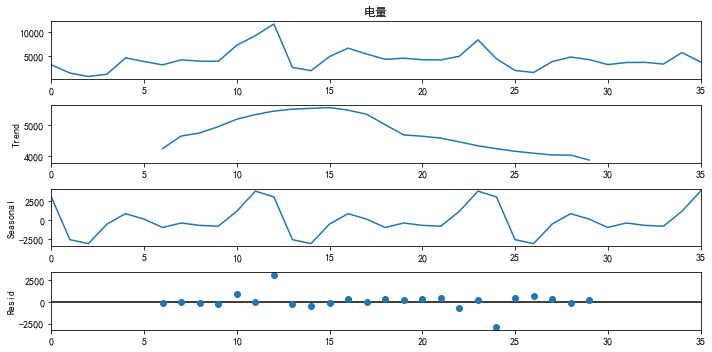

In [126]:
##指数平滑预测交通
df = pd.read_excel('交通时间序列.xlsx')
#分解
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
result = seasonal_decompose(df['电量'], model='additive', freq=12)
 
rcParams['figure.figsize'] = 10, 5
result.plot()
pyplot.figure(figsize=(40,10))
pyplot.show()

In [127]:
#指数平滑预测(无趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend=None, seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


560.2297979946838

In [128]:
#指数平滑预测(无趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend=None, seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

558.1126150670477

In [129]:
#指数平滑预测(加法趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

567.2410243282034

In [130]:
#指数平滑预测(加法趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='add', seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


552.6523347118363

In [131]:
#指数平滑预测(乘法趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='multiplicative', seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

567.3265500015318

In [132]:
#指数平滑预测(乘法趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='multiplicative', seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


550.9023612636533

In [133]:
#确定模型，预测4期数据 【乘法趋势，乘法周期)】
fcast = EMA_fit.forecast(4)
fcast

36    5053.535355
37    1541.471234
38    1025.343007
39    2126.294355
dtype: float64

E:\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


NameError: name 'pyplot' is not defined

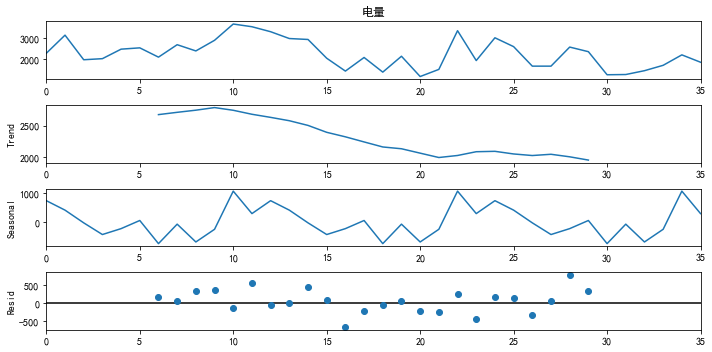

In [134]:
##指数平滑预测娱乐及观光活动
df = pd.read_excel('娱乐及观光活动时间序列.xlsx')
#分解
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
result = seasonal_decompose(df['电量'], model='additive', freq=12)
 
rcParams['figure.figsize'] = 10, 5
result.plot()
pyplot.figure(figsize=(40,10))
pyplot.show()

In [141]:
#指数平滑预测(无趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend=None, seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

484.2965147086348

In [136]:
#指数平滑预测(无趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend=None, seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

485.3738173424437

In [137]:
#指数平滑预测(加法趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


517.0482942930088

In [138]:
#指数平滑预测(加法趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='add', seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


516.7913992713026

In [139]:
#指数平滑预测(乘法趋势，加法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='multiplicative', seasonal='add').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


512.7125249851737

In [140]:
#指数平滑预测(乘法趋势，乘法周期)
from statsmodels.tsa.api import ExponentialSmoothing
EMA_fit = ExponentialSmoothing(df['电量'], seasonal_periods=12, trend='multiplicative', seasonal='multiplicative').fit(use_boxcox=True)
EMA_fit.bic

E:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


511.3920694008376

In [142]:
#确定模型，预测4期数据 【无趋势，加法周期】
fcast = EMA_fit.forecast(4)
fcast

36    2128.394540
37    2187.969613
38    1571.299270
39    1378.632818
dtype: float64